The objective is to calibrate parameters $\rho$ and $\alpha$ of the CES utility function:


$$u(x,T) = [\alpha T_{int}^\rho + (1 - \alpha) x^\rho ]^{1\rho}$$


We know rel

In [ ]:
import os
import pandas as pd
import numpy as np

from numpy import log
from scipy.optimize import curve_fit, root
from project.model import get_inputs
from project.thermal import heat_intensity
from project.utils import reindex_mi, make_plot

## Data
Phebus 2012
Logisitic curve from Allibe 2012

In [ ]:
budget = pd.Series([i / 100 for i in range(1, 50, 1)])
intensity = heat_intensity(budget)
intensity.index = budget
intensity

In [ ]:
make_plot(intensity, 'Heating intensity (%)', integer=False, legend=False)

In [ ]:
# 'buildingstock_example.csv'
resirf_inputs = get_inputs(variables=['buildings', 'income', 'energy_prices'],
                           building_stock=os.path.join('project', 'input', 'stock', 'buildingstock_sdes2018_simple_1.csv'))
buildings = resirf_inputs['buildings']
income = resirf_inputs['income']
income.index.names = ['Income tenant']
price = resirf_inputs['energy_prices'].iloc[0, :]


In [ ]:
heat_consumption = buildings.heating_consumption() * buildings.surface
energy_bill = buildings.energy_bill(price, heat_consumption)
income = reindex_mi(income, energy_bill.index)
budget_share = energy_bill / income
heating_intensity = heat_intensity(budget_share)

In [ ]:
heating_intensity.describe()

In [ ]:
def demand_ces_homogenous(X, sigma):
    """Demand function derived from ces utility function.


    Represents the tradeoff between thermal comfort and energy expenditure.

    Parameters
    ----------
    X: tuple
        Income, Price
    sigma: elasticity of subsitution
    alpha

    Returns
    -------

    """
    income, energy_bill = X
    return energy_bill**(sigma - 1) * income / (energy_bill**sigma + 1)


def rho_ces(income, energy_bill, s):
    P = income / 1
    X = s / (income - energy_bill * s)
    return log(P) / log(X) + 1



In [ ]:
def demand_ces_sigma(X, sigma, alpha):
    """Demand function derived from ces utility function.


    Represents the tradeoff between thermal comfort and energy expenditure.

    Parameters
    ----------
    X: tuple
        Income, Price
    sigma: elasticity of subsitution
    alpha

    Returns
    -------

    """
    income, energy_bill = X
    s = (alpha / energy_bill)**sigma * income / (alpha**sigma * energy_bill**(1 -sigma) +  (1 - alpha)**sigma)
    x = (1 - alpha)**sigma *  income / (alpha**sigma * energy_bill**(1 - sigma) + (1 - alpha)**sigma)
    return s

In [ ]:
best_vals, covar = curve_fit(demand_ces_sigma, (income, energy_bill), heating_intensity, p0=(0.9, 0.1), method='dogbox', bounds=((-np.inf, 0.0001),(1, 0.9999)))
print(best_vals)
intensity_calc = demand_ces_sigma((income, energy_bill), best_vals[0], best_vals[1])

In [ ]:
pd.concat((intensity_calc, heating_intensity, energy_bill), axis=1)

In [ ]:
df = intensity_calc.copy()
df.index = heating_intensity
make_plot(df, 'Heating intensity (%)', integer=False)

In [ ]:
a

In [ ]:
b

In [105]:
best_vals, covar = curve_fit(demand_ces_sigma, (income, energy_bill), heating_intensity, p0=(0.9, 0.1), method='dogbox', bounds=((-np.inf, 0.0001),(1, 0.9999)))
print(best_vals)
intensity_calc = demand_ces_sigma((income, energy_bill), best_vals[0], best_vals[1])

[7.33387472e-01 1.00000000e-04]


In [106]:
pd.concat((intensity_calc, heating_intensity, energy_bill), axis=1)

0  \
Existing Occupancy status Income owner Income tenant Housing type  Heating system                 Wall Floor Roof Windows             
True     Owner-occupied   D1           D1            Multi-family  Natural gas-Performance boiler 0.1  0.2   0.1  1.6      0.237640   
                                                                   Oil fuel-Performance boiler    0.1  0.2   0.1  1.6      0.213313   
                                                                   Wood fuel-Performance boiler   0.1  0.2   0.1  1.6      0.282089   
                                                                   Electricity-Heat pump water    0.1  0.5   0.1  1.6      0.312259   
                                                                   Natural gas-Performance boiler 0.1  0.5   0.1  1.6      0.225716   
...                                                                                                                             ...   
         Social-housing   D10          D9            Single-family Natural gas-Performance boiler 2.5  2.0   0.5  3.0      0.243629   
                                                                   Oil fuel-Performance boiler    2.5  2.0   0.5  3.0      0.218653   
                                                                   Natural gas-Performance boiler 2.5  2.0   2.5  3.0      0.202735   
                                                                   Oil fuel-Performance boiler    2.5  2.0   2.5  3.0      0.181947   
                                                                   Wood fuel-Standard boiler      2.5  2.0   2.5  3.0      0.202291   

                                                                                                                                  1  \
Existing Occupancy status Income owner Income tenant Housing type  Heating system                 Wall Floor Roof Windows             
True     Owner-occupied   D1           D1            Multi-family  Natural gas-Performance boiler 0.1  0.2   0.1  1.6      0.856926   
                                                                   Oil fuel-Performance boiler    0.1  0.2   0.1  1.6      0.828849   
                                                                   Wood fuel-Performance boiler   0.1  0.2   0.1  1.6      0.901507   
                                                                   Electricity-Heat pump water    0.1  0.5   0.1  1.6      0.927927   
                                                                   Natural gas-Performance boiler 0.1  0.5   0.1  1.6      0.843542   
...                                                                                                                             ...   
         Social-housing   D10          D9            Single-family Natural gas-Performance boiler 2.5  2.0   0.5  3.0      0.743557   
                                                                   Oil fuel-Performance boiler    2.5  2.0   0.5  3.0      0.715481   
                                                                   Natural gas-Performance boiler 2.5  2.0   2.5  3.0      0.695862   
                                                                   Oil fuel-Performance boiler    2.5  2.0   2.5  3.0      0.667785   
                                                                   Wood fuel-Standard boiler      2.5  2.0   2.5  3.0      0.695293   

                                                                                                                                     2  
Existing Occupancy status Income owner Income tenant Housing type  Heating system                 Wall Floor Roof Windows               
True     Owner-occupied   D1           D1            Multi-family  Natural gas-Performance boiler 0.1  0.2   0.1  1.6       201.411230  
                                                                   Oil fuel-Performance boiler    0.1  0.2   0.1  1.6       233.304828  
                                                                   Woo

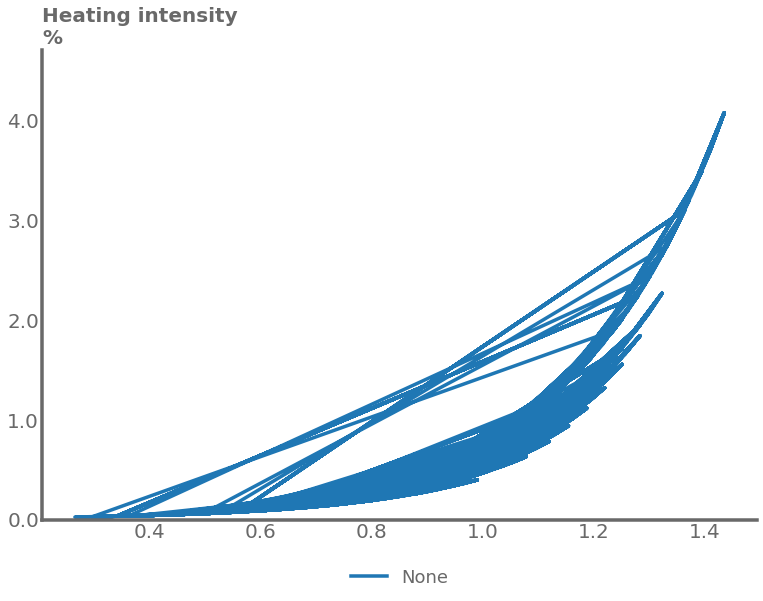

In [107]:
df = intensity_calc.copy()
df.index = heating_intensity
make_plot(df, 'Heating intensity (%)', integer=False)

Existing  Occupancy status  Income owner  Income tenant  Housing type   Heating system                  Wall  Floor  Roof  Windows
True      Owner-occupied    D1            D1             Multi-family   Natural gas-Performance boiler  0.1   0.2    0.1   1.6        0.856926
                                                                        Natural gas-Standard boiler     2.5   2.5    2.5   4.5        0.434843
                                                         Single-family  Natural gas-Standard boiler     2.5   2.5    2.5   4.5        0.241043
                                                                        Natural gas-Performance boiler  0.1   0.2    0.1   1.6        0.706972
                            D10           D10            Multi-family   Natural gas-Performance boiler  0.1   0.2    0.1   1.6        1.301570
                                                                        Natural gas-Standard boiler     2.5   2.5    2.5   4.5        0.879487
           

In [69]:
a

array([7.57826395e-01, 1.00000000e-04])

In [70]:
b

array([[3.06188160e-01, 5.96609720e-04],
       [5.96609720e-04, 1.16387919e-06]])

In [57]:
P = energy_bill / 1
X = heating_intensity / (income - energy_bill * heating_intensity)
rho = log(P) / log(X) + 1
sigma = rho / (rho - 1)
print(demand_ces_homogenous((income, energy_bill), sigma))
p0 = sigma.mean()
sigma_fit, _, _, msg, _ = curve_fit(demand_ces_homogenous, (income, energy_bill), heating_intensity, p0=p0, method='lm', full_output=True)
print(msg)
rho_fit =  sigma_fit / (sigma_fit - 1)
print(rho_fit, sigma_fit)
print(sigma_fit[0])

Existing  Occupancy status  Income owner  Income tenant  Housing type   Heating system                  Wall  Floor  Roof  Windows
True      Owner-occupied    D1            D1             Multi-family   Natural gas-Performance boiler  0.1   0.2    0.1   1.6        0.856926
                                                                        Natural gas-Standard boiler     2.5   2.5    2.5   4.5        0.434843
                                                         Single-family  Natural gas-Standard boiler     2.5   2.5    2.5   4.5        0.241043
                                                                        Natural gas-Performance boiler  0.1   0.2    0.1   1.6        0.706972
                            D10           D10            Multi-family   Natural gas-Performance boiler  0.1   0.2    0.1   1.6        1.301570
                                                                        Natural gas-Standard boiler     2.5   2.5    2.5   4.5        0.879487
           

In [ ]:
sigma

In [ ]:
s, x = demand_ces((income, energy_bill), -0.5, 0.001)
print(s, x)
print(energy_bill * s + x, income)

In [ ]:
s, x = demand_ces((income, energy_bill), 0.5, 0.1)
print(s, x)
print(energy_bill * s + x, income)

In [ ]:
heating_intensity_fit = demand_ces_homogenous((income, energy_bill), sigma_fit[0])
heating_intensity_fit

In [ ]:
pd.concat((heating_intensity, heating_intensity_fit), axis=1)

In [ ]:
demand_ces((income, energy_bill), rho_fit[0], 0.5)


In [ ]:
demand_ces((income, energy_bill), sigma_fit[0], 0.5)

In [ ]:
p0 = (0.5, 0.5)
demand_ces((income, energy_bill), p0[0], p0[1])

In [ ]:
curve_fit(demand_ces, (income, energy_bill), heating_intensity, p0=p0, method='lm', full_output=True)


In [ ]:
curve_fit(demand_ces, (income, energy_bill), heating_intensity, p0=p0, method='trf')

In [ ]:
curve_fit(demand_ces, (income, energy_bill), heating_intensity, p0=p0, method='dogbox')